## Zillow Data

## Project Outline:
- Deliver presenatation: Monday morning, 20 June
- Day 0: Today: Tuesday, 14 June
    - project outline and outlier handling
    - incorporate the last project's findings/recommendations as an intro/recap
- Day 1: Wednesday: Full Wrangle and Explore
    - define high logerror, visually plot variables with a high propensity to produce distinct logerror clusters >> end the day with clusters
- Day 2: Thurday: Full Explore
    - fully explore clusters/subsets and 
- Day 3: Friday: Model and produce fianl notebook, README, and 
    - model the logerror by cluster with an appropriate linear regression predictor (predicts continuous values)

## 1. Wrangle

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import env
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
# reloads import files each time a cell is ran
%load_ext autoreload
%autoreload 2

In [3]:
#acquire the zillow data
df = wrangle.get_zillow_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        76 non-null     float64
 1   buildingclasstypeid           0 non-null      float64
 2   heatingorsystemtypeid         33936 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   storytypeid                   47 non-null     float64
 6   propertylandusetypeid         52442 non-null  float64
 7   parcelid                      52442 non-null  int64  
 8   id                            52442 non-null  int64  
 9   logerror                      52442 non-null  float64
 10  transactiondate               52442 non-null  object 
 11  id.1                          52442 non-null  int64  
 12  basementsqft                  47 non-null     float64
 13  b

In [4]:
# check the size of the data
df.shape

(52442, 69)

In [5]:
# run the data through our function to handle missing values
df = wrangle.handle_missing_values(df)
df.head()

,heatingorsystemtypeid,propertylandusetypeid,parcelid,id,logerror,transactiondate,id.1,bathroomcnt,bedroomcnt,buildingqualitytypeid,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,heatingorsystemdesc
0,NaN,261.0,14297519,0,0.025595,2017-01-01,1727539,3.5,4.0,NaN,...,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,NaN
1,NaN,261.0,17052889,1,0.055619,2017-01-01,1387261,1.0,2.0,NaN,...,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,NaN
2,NaN,261.0,14186244,2,0.005383,2017-01-01,11677,2.0,3.0,NaN,...,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,NaN
3,2.0,261.0,12177905,3,-0.103410,2017-01-01,2288172,3.0,4.0,8.0,...,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,Central
4,2.0,261.0,12095076,6,-0.001011,2017-01-01,781532,3.0,4.0,9.0,...,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential,Central


In [5]:
df.isna().mean()

heatingorsystemtypeid           0.352082
propertylandusetypeid           0.000000
parcelid                        0.000000
id                              0.000000
logerror                        0.000000
transactiondate                 0.000000
id.1                            0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.355805
calculatedbathnbr               0.001375
calculatedfinishedsquarefeet    0.000325
finishedsquarefeet12            0.003475
fips                            0.000000
fullbathcnt                     0.001375
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.006873
propertycountylandusecode       0.000000
propertyzoningdesc              0.353953
rawcensustractandblock          0.000000
regionidcity                    0.019684
regionidcounty                  0.000000
regionidzip                     0.000439
roomcnt         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52377 entries, 0 to 52441
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         33936 non-null  float64
 1   propertylandusetypeid         52377 non-null  float64
 2   parcelid                      52377 non-null  int64  
 3   id                            52377 non-null  int64  
 4   logerror                      52377 non-null  float64
 5   transactiondate               52377 non-null  object 
 6   id.1                          52377 non-null  int64  
 7   bathroomcnt                   52377 non-null  float64
 8   bedroomcnt                    52377 non-null  float64
 9   buildingqualitytypeid         33741 non-null  float64
 10  calculatedbathnbr             52305 non-null  float64
 11  calculatedfinishedsquarefeet  52360 non-null  float64
 12  finishedsquarefeet12          52195 non-null  float64
 13  f

In [7]:
# we can see that we ended up with 52,377 rows after cleaning the data.
# we started with 52,442 from the initial SQL query

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52377 entries, 0 to 52441
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         33936 non-null  float64
 1   propertylandusetypeid         52377 non-null  float64
 2   parcelid                      52377 non-null  int64  
 3   id                            52377 non-null  int64  
 4   logerror                      52377 non-null  float64
 5   transactiondate               52377 non-null  object 
 6   id.1                          52377 non-null  int64  
 7   bathroomcnt                   52377 non-null  float64
 8   bedroomcnt                    52377 non-null  float64
 9   buildingqualitytypeid         33741 non-null  float64
 10  calculatedbathnbr             52305 non-null  float64
 11  calculatedfinishedsquarefeet  52360 non-null  float64
 12  finishedsquarefeet12          52195 non-null  float64
 13  f

In [9]:
df = wrangle.wrangle_zillow()
df.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,heatingorsystemdesc
0,14297519,0.025595,2017-01-01,3.5,4.0,3.5,3100.0,3100.0,orange_county,3.0,...,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,NaN
1,17052889,0.055619,2017-01-01,1.0,2.0,1.0,1465.0,1465.0,ventura,1.0,...,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,NaN
2,14186244,0.005383,2017-01-01,2.0,3.0,2.0,1243.0,1243.0,orange_county,2.0,...,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,NaN
3,12177905,-0.103410,2017-01-01,3.0,4.0,3.0,2376.0,2376.0,los_angeles,3.0,...,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,Central
4,12095076,-0.001011,2017-01-01,3.0,4.0,3.0,2962.0,2962.0,los_angeles,3.0,...,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential,Central


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52377 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52377 non-null  int64  
 1   logerror                      52377 non-null  float64
 2   transactiondate               52377 non-null  object 
 3   bathroomcnt                   52377 non-null  float64
 4   bedroomcnt                    52377 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   finishedsquarefeet12          52195 non-null  float64
 8   fips                          52377 non-null  object 
 9   fullbathcnt                   52305 non-null  float64
 10  latitude                      52377 non-null  float64
 11  longitude                     52377 non-null  float64
 12  lotsizesquarefeet             52017 non-null  float64
 13  p

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedbathnbr'}>],
       [<AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet12'}>,
        <AxesSubplot:title={'center':'fullbathcnt'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>],
       [<AxesSubplot:title={'center':'roomcnt'}>,
        <AxesSubplot:title={'center':'unitcnt'}>,
        <AxesSubplot:title={'center':'yearbuil

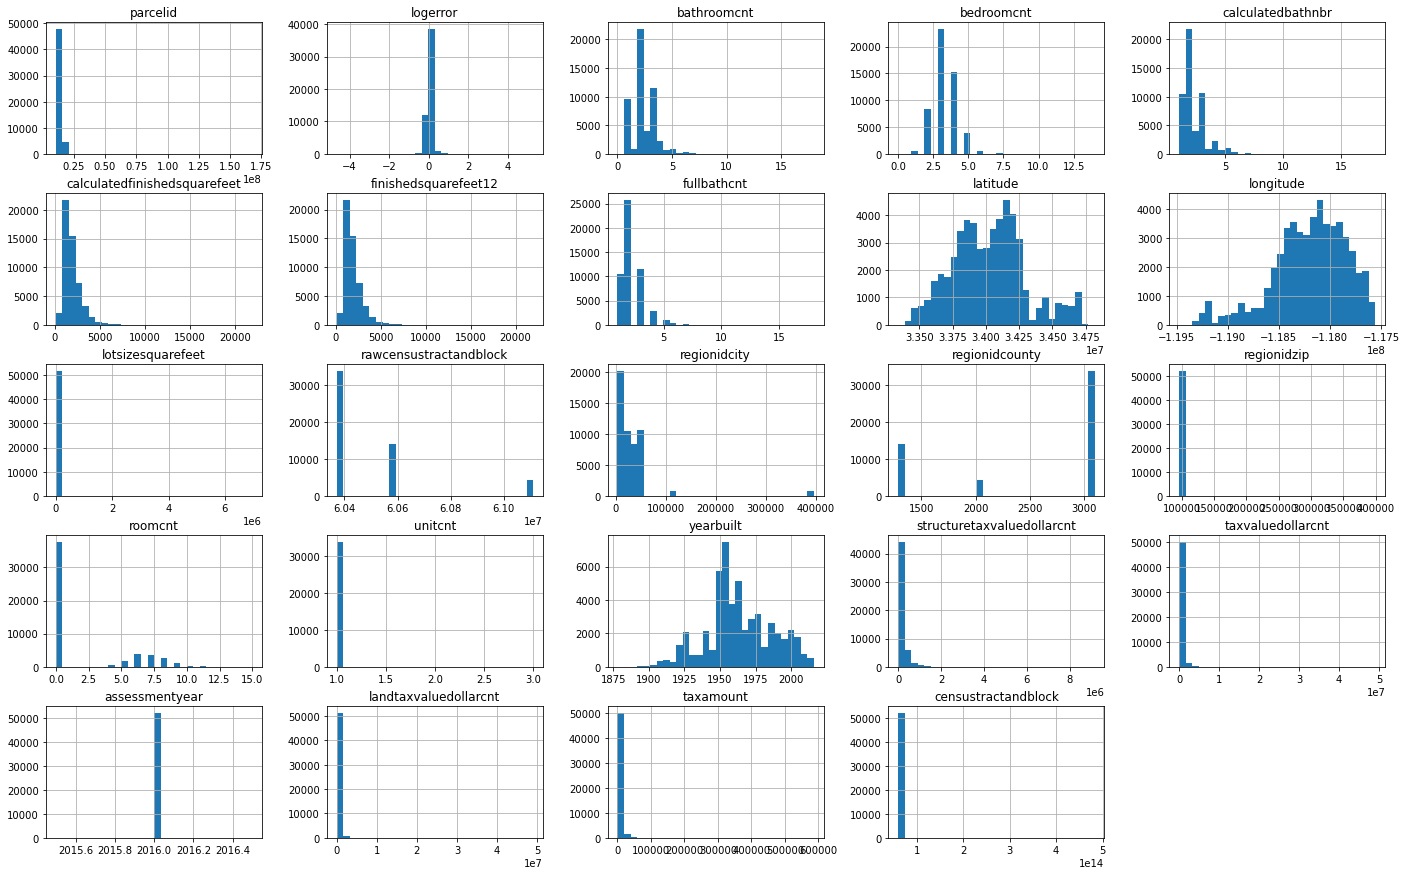

In [11]:
df.hist(figsize=(24, 15), bins=30)

In [12]:
df.isna().mean()

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
bathroomcnt                     0.000000
bedroomcnt                      0.000000
calculatedbathnbr               0.001375
calculatedfinishedsquarefeet    0.000325
finishedsquarefeet12            0.003475
fips                            0.000000
fullbathcnt                     0.001375
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.006873
propertycountylandusecode       0.000000
propertyzoningdesc              0.353953
rawcensustractandblock          0.000000
regionidcity                    0.019684
regionidcounty                  0.000000
regionidzip                     0.000439
roomcnt                         0.000000
unitcnt                         0.353762
yearbuilt                       0.000974
structuretaxvaluedollarcnt      0.001451
taxvaluedollarcnt               0.000019
assessmentyear  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52377 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52377 non-null  int64  
 1   logerror                      52377 non-null  float64
 2   transactiondate               52377 non-null  object 
 3   bathroomcnt                   52377 non-null  float64
 4   bedroomcnt                    52377 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   finishedsquarefeet12          52195 non-null  float64
 8   fips                          52377 non-null  object 
 9   fullbathcnt                   52305 non-null  float64
 10  latitude                      52377 non-null  float64
 11  longitude                     52377 non-null  float64
 12  lotsizesquarefeet             52017 non-null  float64
 13  p

In [14]:
#check the wrangle zillow function's output against indiv fucntions
df = wrangle.wrangle_zillow()
df.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertylandusedesc,heatingorsystemdesc
0,14297519,0.025595,2017-01-01,3.5,4.0,3.5,3100.0,3100.0,orange_county,3.0,...,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,Single Family Residential,NaN
1,17052889,0.055619,2017-01-01,1.0,2.0,1.0,1465.0,1465.0,ventura,1.0,...,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,Single Family Residential,NaN
2,14186244,0.005383,2017-01-01,2.0,3.0,2.0,1243.0,1243.0,orange_county,2.0,...,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,Single Family Residential,NaN
3,12177905,-0.103410,2017-01-01,3.0,4.0,3.0,2376.0,2376.0,los_angeles,3.0,...,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,Single Family Residential,Central
4,12095076,-0.001011,2017-01-01,3.0,4.0,3.0,2962.0,2962.0,los_angeles,3.0,...,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,Single Family Residential,Central


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52377 entries, 0 to 52441
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52377 non-null  int64  
 1   logerror                      52377 non-null  float64
 2   transactiondate               52377 non-null  object 
 3   bathroomcnt                   52377 non-null  float64
 4   bedroomcnt                    52377 non-null  float64
 5   calculatedbathnbr             52305 non-null  float64
 6   calculatedfinishedsquarefeet  52360 non-null  float64
 7   finishedsquarefeet12          52195 non-null  float64
 8   fips                          52377 non-null  object 
 9   fullbathcnt                   52305 non-null  float64
 10  latitude                      52377 non-null  float64
 11  longitude                     52377 non-null  float64
 12  lotsizesquarefeet             52017 non-null  float64
 13  p

In [16]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = df[col][df[col] > 0]
    print(data.describe())

## 2. Explore

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,52377.0,1.299146e+07,3.276096e+06,1.071186e+07,1.150904e+07,1.257566e+07,1.412745e+07,1.676392e+08
logerror,52377.0,1.828594e-02,1.772334e-01,-4.655420e+00,-2.462390e-02,6.999483e-03,4.066519e-02,5.262999e+00
bathroomcnt,52377.0,2.302222e+00,1.020227e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52377.0,3.304733e+00,9.426137e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
calculatedbathnbr,52305.0,2.304732e+00,1.017958e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
...,...,...,...,...,...,...,...,...
taxvaluedollarcnt,52376.0,5.282433e+05,7.488718e+05,1.000000e+03,1.936392e+05,3.734305e+05,6.185355e+05,4.906124e+07
assessmentyear,52377.0,2.016000e+03,0.000000e+00,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03
landtaxvaluedollarcnt,52376.0,3.326568e+05,5.689639e+05,1.610000e+02,7.593900e+04,2.178310e+05,4.080000e+05,4.895220e+07
taxamount,52373.0,6.436171e+03,8.713952e+03,4.918000e+01,2.655440e+03,4.644880e+03,7.370940e+03,5.866393e+05


In [7]:
import split

In [8]:
train, validate, test = split.train_validate_test_split(df,'taxvaluedollarcnt')
train.shape, validate.shape, test.shape

((29330, 35), (12571, 35), (10476, 35))

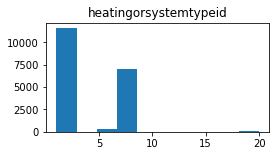

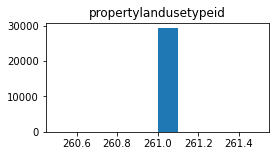

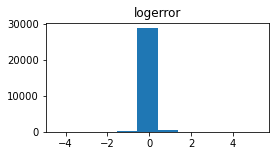

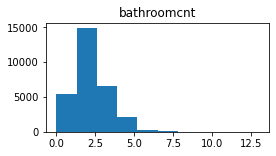

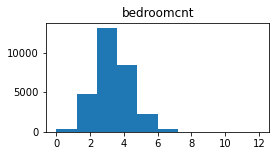

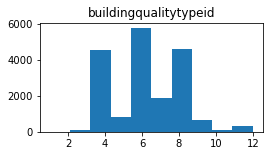

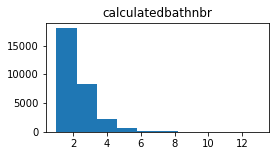

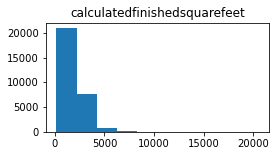

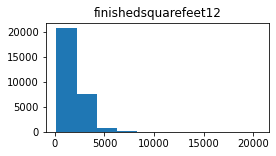

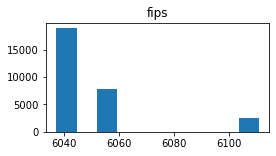

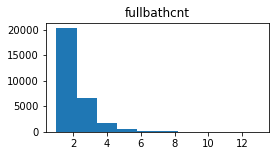

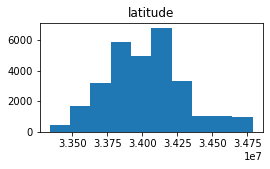

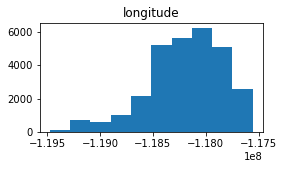

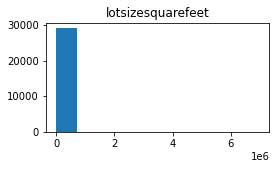

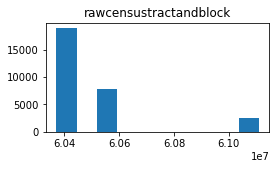

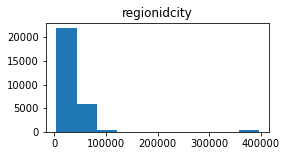

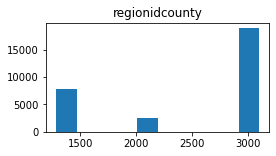

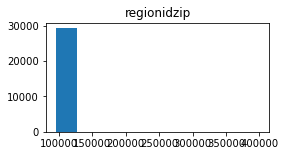

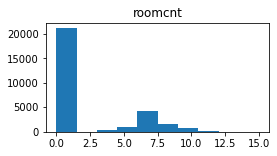

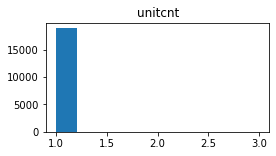

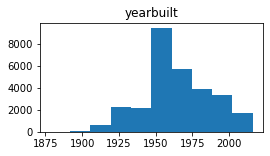

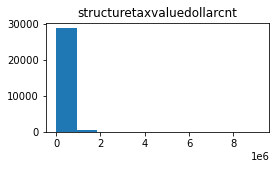

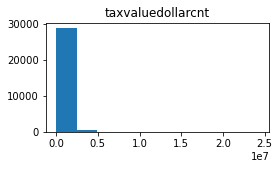

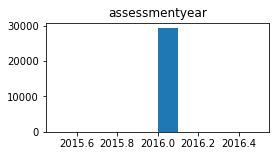

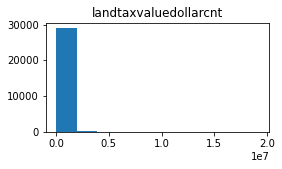

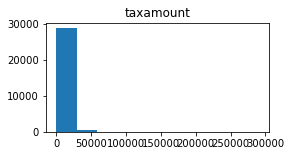

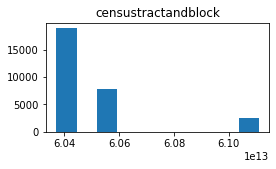

In [9]:
numeric_cols = df.select_dtypes('float64').columns
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways from single variable distributions:
- logerror is normal, centered on 0
- baths is right skewed, centered on 2
- beds is right skewed, centered on 4
- calcbathnbr is right skewed, centered on 2
- finishedsqft is right skewed, centered 2500
- fips is divided unequally among 3 counties, with LA highest
- roomcnt has a normal dist around 6.5, where not null or 0 (lots of zeroes)
- year built is is right skewed, centered on 1950-60
- get rid of columns with mainly one value:
    - assessemnt year
    - unitcnt
    - finishedsquareft12 is same as calculatedfinishedsqft
- make zips/ids into objects:
    - regionidzip
    - regionidcounty
    - regionidcity

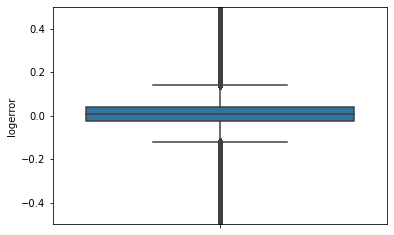

In [25]:
sns.boxplot(data=train, y=train.logerror)
plt.ylim(-0.5,0.5)
plt.show()

### Questions:
1. is there a relationship between logerror and fips?
2. is there a relationship between logerror and yearbuilt?
3. is there a relationship between logerror and taxvaluedollarcnt?
4. controlling for fips, is there a relationship between logerror and calculatedfinishedsqft?

### 1. is there a relationship between logerror and fips?

In [6]:
sns.boxplot(train.fips, train.logerror)
plt.title("is there a relationship between logerror and fips?")
plt.ylim(-1, 1)
plt.show()

NameError: name 'train' is not defined

In [ ]:
sns.scatterplot(train.fips, train.logerror, hue=train.taxvaluedollarcnt)
plt.title("is there a relationship between logerror and fips?")
plt.show()

In [ ]:
sns.scatterplot(y=train.taxvaluedollarcnt, x=train.logerror)
plt.title("is there a relationship between logerror and fips?")
plt.show()

In [ ]:
-cluster centers as points on a polynomial linear function
